In [28]:
from pymatgen.ext.matproj import MPRester

with MPRester ("z5aIUAkpFPTHndsr") as m:
    
    #Création de la structure du cristal à partir du MP
    structure = m.get_structure_by_material_id("mp-15783")

In [29]:
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

#Création de la structure de bande du cristal
bandstruct = m.get_bandstructure_by_material_id("mp-15783")

#Création d'un objet BSPlotter pour pouvoir afficher le graphe
BS = BSPlotter(bandstruct)

#Récupération des éléments intéressant de la structure de bande
Elem = BS.bs_plot_data()




Danc cette partie, nous allons analyser la structure de bande du cristal $KSmS_2$. 

L'image ci-dessous représente la zone de Brillouin ainsi que les points critiques qui nous serons utiles pour le reste de la question.

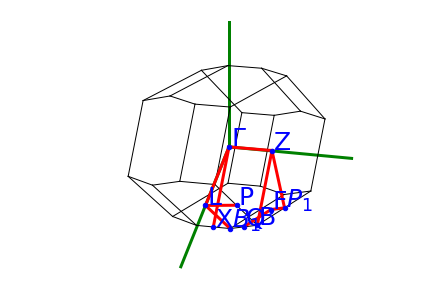

In [30]:
BS.plot_brillouin()

# 1) Bande interdite <h1>
    
Par définition, la bande interdite est une bande dans laquelle aucun niveau d'énergie ne peut être occupé par les électrons du cristal. Cela signifie donc que la densité d'état sur cette bande est nulle. Dans notre cas, la bande interdite est déterminée par la fonction  suivante :

In [7]:
#Détermination de la bande interdite
BI = bandstruct.get_band_gap()
print(BI)

{'direct': False, 'energy': 2.2759, 'transition': '\\Gamma-F'}


La bande interdite est dite "indirecte", c'est-à-dire que le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. Il faudra donc apporter à un électron une énergie supérieure à la valeur de la bande interdite pour le faire passer de la bande de valence à la bande de conduction. 

La bande interdite a comme valeur 2.2759eV et la transition se fait du kpoint $\Gamma$ au kpoint F.

Sur l'image ci-dessous, le maximum de la dernière bande de valence est représenté par un point vert et le minimum de la première bande de conduction par un point rouge. La flèche indique la transition et la partie rouge représente la bande interdite. 
<img src="https://github.com/sderaedemack/lmapr1492/blob/master/Images/Bande_interdite.png?raw=true" width="600">

# 2) Dispersion <h>
    
Pour trouver les directions dans la dernière (première) bande de valence (conduction) présentant le plus et le moins de dispersion, nous regardons la valeur absolue la plus (moins) élevée de la pente dans chaque branche définie par les axes verticaux.

In [48]:
#########Bande de valence#########
#Création de variable pour pouvoir trouver la pente maximale et minimale 
xi = 0 #Valeur du vecteur d'onde k à gauche
bandsi = 0 #Valeur de l'énergie à gauche
xf = 0 #Valeur du vecteur d'onde k à droite
bandsf = 0 #Valeur de l'énergie à droite
pente_max = 0 #Valeur de la pente maximale
pente_min = 100 #valeur de la pente minimale
x_max  = [0,0] #Paire de valeurs de vecteur d'onde là où se situe la pente maximale
bands_max = [0,0] #Paire de valeur d'énergie où se situe la pente maximale
x_min = [0,0] #Paire de valeurs de vecteur d'onde là où se situe la pente minimale
bands_min = [0,0] #Paire de valeur d'énergie où se situe la pente minimale

#On commence à parcourir les valeurs d'abscisse et d'ordonée possibles. On se concentre sur une branche à la fois.
#On ne regarde d'abord que la dernière bande de valence. Cette bande porte le numéro 15 dans l'ensemble des bandes du
#cristal.
for xpath, epath in zip(Elem["distances"], Elem["energy"]):
    xi = xpath[0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche
    bandsi = epath['1'][15][0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche. On récupère
                               #l'énergie de chaque branche pour la 15ème bande.
    xf = xpath[len(xpath)-1] #La valeur de droite correspond à la valeur la plus à droite de la branche
    bandsf = epath['1'][15][len(epath['1'][15])-1]    
    pente = np.abs((bandsf-bandsi)/(xf-xi)) #Calcul de la valeur absolue de la pente
    if pente >= pente_max:
        pente_max  = pente
        x_max = [xi,xf]
        bands_max = [bandsi,bandsf]
    if pente <= pente_min:
        pente_min = pente
        x_min = [xi,xf]
        bands_min = [bandsi,bandsf]

#Affichage des vecteurs d'onde et des énergies correspondant à la pente maximale et minimale pour pouvoir la situer sur le graphe
print('La pente maximale de la dernière bande de valence se situe entre les abscisses ' + str(x_max) + 
      '\n et entre les ordonnées ' + str(bands_max) + ' et vaut en valeur absolue ' + str(pente_max))
print('La pente minimale de la dernière bande de valence se situe entre les abscisses ' + str(x_min) + 
      '\n et entre les ordonnées ' + str(bands_min) + ' et vaut en valeur absolue ' + str(pente_min))

La pente maximale de la dernière bande de valence se situe entre les abscisses [2.8271804605563706, 3.8640146628395815]
 et entre les ordonnées [0.0, -0.8501000000000001] et vaut en valeur absolue 0.8198996504243362
La pente minimale de la dernière bande de valence se situe entre les abscisses [4.3426338799492346, 4.491683543177971]
 et entre les ordonnées [-0.5222000000000001, -0.5340000000000001] et vaut en valeur absolue 0.07916824328473228


In [49]:
#########Bande de conduction#########
#Création de variable pour pouvoir trouver la pente maximale et minimale
xi = 0 #Valeur du vecteur d'onde k à gauche
bandsi = 0 #Valeur de l'énergie à gauche
xf = 0 #Valeur du vecteur d'onde k à droite
bandsf = 0 #Valeur de l'énergie à droite
pente_max = 0 #Valeur de la pente maximale
pente_min = 100 #valeur de la pente minimale
x_max  = [0,0] #Paire de valeurs de vecteur d'onde là où se situe la pente maximale
bands_max = [0,0] #Paire de valeur d'énergie où se situe la pente maximale
x_min = [0,0] #Paire de valeurs de vecteur d'onde là où se situe la pente minimale
bands_min = [0,0] #Paire de valeur d'énergie où se situe la pente minimale

#On commence à parcourir les valeurs d'abscisse et d'ordonée possibles. On se concentre sur une branche à la fois.
#On ne regarde que la première bande de conduction. Cette bande porte le numéro 16 dans l'ensemble des bandes du
#cristal.
for xpath, epath in zip(Elem["distances"], Elem["energy"]):
    xi = xpath[0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche
    bandsi = epath['1'][16][0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche. On récupère
                               #l'énergie de chaque branche pour la 16ème bande.
    xf = xpath[len(xpath)-1] #La valeur de droite correspond à la valeur la plus à droite de la branche
    bandsf = epath['1'][16][len(epath['1'][16])-1]    
    pente = np.abs((bandsf-bandsi)/(xf-xi)) #Calcul de la valeur absolue de la pente
    if pente >= pente_max:
        pente_max  = pente
        x_max = [xi,xf]
        bands_max = [bandsi,bandsf]
    if pente <= pente_min:
        pente_min = pente
        x_min = [xi,xf]
        bands_min = [bandsi,bandsf]

#Affichage des vecteurs d'onde et des énergies correspondant au delta d'énergie maximum et minimum pour pouvoir 
#la situer sur le graphe
print('La pente maximale de la première bande de conduction se situe entre les abscisses ' + str(x_max) + 
      '\n et entre les ordonnées ' + str(bands_max) + ' et vaut en valeur absolue ' + str(pente_max))
print('La pente minimale de la première bande de conduction se situe entre les abscisses ' + str(x_min) + 
      '\n et entre les ordonnées ' + str(bands_min) + ' et vaut en valeur absolue ' + str(pente_min))

La pente maximale de la première bande de conduction se situe entre les abscisses [3.8640146628395815, 4.3426338799492346]
 et entre les ordonnées [3.6165, 2.2759] et vaut en valeur absolue 2.8009740354676658
La pente minimale de la première bande de conduction se situe entre les abscisses [1.4445767231015862, 2.401815070025256]
 et entre les ordonnées [3.586, 3.461] et vaut en valeur absolue 0.13058398715609282


Si nous nous intéressons dans un premier temps à la dernière bande de valence, nous pouvons observer que la direction dans laquelle elle présente le plus de dispersion (représentée par la flèche rouge) est $\Gamma - X|Q$. La direction avec le moins de dispersion (représentée par la flèche verte) est quant à elle $F-P_1$.

Regardons ensuite la première bande de conduction. La direction dans laquelle cette bande présente le plus de dispersion (flèche rouge) est $X|Q-F$. La direction avec le moins de dispersion (flèche verte) est $B_1|B-Z$.
<img src="https://github.com/sderaedemack/lmapr1492/blob/master/Images/band_dispersion.png?raw=true" width="700">

# 3) Masse effective <h1>
    
Si nous supposons que la dispersion est parabolique, l'équation de la masse effective $m^*$ peut s'écrire

\begin{equation}
    m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}
\end{equation}

avec $\hbar$ la contante réduite de Planck égale à $6.582 \times 10^{−16} eVs$.

Pour des états proches des maxima et minima de bande, cette équation peut-être approximée par

\begin{equation}
    E(k)-E_0=\pm \frac{\hbar^2}{2m^*}(k_x^2+k_y^2+k_z^2).
\end{equation}

Pour la suite du développement, nous considèrerons que $E(k)-E_0$ correspond à l'énergie de l'électron.

In [50]:
#########Bande de valence#########
h_bar = 6.582119570 * 1e-16 #eVs

#Récupération des données du maximum de la dernière bande de valence
VBM = bandstruct.get_vbm()

#Récupération du vecteur d'onde associé en coordonnées factionnelles
kpoint = VBM.get('kpoint').frac_coords

#Calcul de la norme
k = np.linalg.norm(kpoint)

print('La valeur de la norme est ' + str(k))

La valeur de la norme est 0.0


Comme nous pouvons le voir, la norme du vecteur d'onde est nulle. Pour pouvoir tout de même utiliser la formule citée plus haut, nous allons profiter de la périodicté du réseau réciproque. En effet, $E_{n,k}=E_{n,k+G}$ avec n le numéro de la bande et $\textbf{G}=l'G+m'G+n'G$ un vecteur du réseau réciproque. La norme de **G** nous est donnée par $G=p\frac{2\pi}{a}$ avec a la norme du vecteur de base du réseau direct et p un entier. 

Nous récupérons la valeur de a dans le code 'lattice'.

In [51]:
#Valeur de la norme de a
a = 7.763862276302451

#Calcul de la norme de G
G = 2*np.pi/a

#Récupération de l'énergie associée au VBM
E = VBM['energy']

#Calcul de la masse effective
m_e = h_bar**2*G**2/(2*E)
print('La masse effective du sommet de la dernière bande de valence est ' + str(m_e) + ' kg')

La masse effective du sommet de la dernière bande de valence est 9.93174099936551e-32 kg


In [52]:
#########Bande de conduction#########

#Récupération des données du minimum de la première bande de conduction
CBM = bandstruct.get_cbm()

#Récupération du vecteur d'onde associé en coordonnées factionnelles
kpoint_CBM = CBM.get('kpoint').frac_coords

#Calcul de la norme
k_CBM = np.linalg.norm(kpoint_CBM)

print('La valeur de la norme est ' + str(k_CBM))



La valeur de la norme est 0.7071067811865476


Dans ce cas, la norme n'est pas nulle, par conséquent il n'est pas nécessaire de modifier le vecteur d'onde.

In [53]:
#Récupération de l'énergie associée au CBM
E_CBM = CBM['energy']

#Calcul de la masse effective
m_e_CBM = h_bar**2*k_CBM**2/(2*E_CBM)

print('La masse effective de la base de la première bande de conduction est ' + str(m_e_CBM) + ' kg')

La masse effective de la base de la première bande de conduction est 2.9238404352781143e-32 kg


# 4) Références <h1>
   
**Code :**

[Band Structure of NiO](https://matgenb.materialsvirtuallab.org/2013/01/01/Bandstructure-of-NiO.html)